# Introduction
This case requires trainees to develop a model for predicting fraudulent transactions for a
financial company and use insights from the model to develop an actionable plan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Fraud.csv")

In [4]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [5]:
df.isna().sum() #no null data

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
df[df["isFlaggedFraud"]==0]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [7]:
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


In [8]:
df = df.drop(['step','nameOrig','nameDest'],axis=1) #dropping irrelevant columns

In [9]:
df

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,0
3,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,0
4,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1,0


In [10]:
df.insert(8,'Merged_Fraud',True)

In [11]:
df.loc[(df['isFraud']==0) & (df['isFlaggedFraud']==0), "Merged_Fraud"] = 0
df.loc[(df['isFraud']==1) & (df['isFlaggedFraud']==0), "Merged_Fraud"] = 1
df.loc[(df['isFraud']==1) & (df['isFlaggedFraud']==1), "Merged_Fraud"] = 2
df

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Merged_Fraud
0,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0,0,0
1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0,0,0
2,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,0,1
3,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,0,1
4,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0,0,0
...,...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1,0,1
6362616,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1,0,1
6362617,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,1
6362618,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1,0,1


In [12]:
df["Merged_Fraud"].value_counts()

0    6354407
1       8197
2         16
Name: Merged_Fraud, dtype: int64

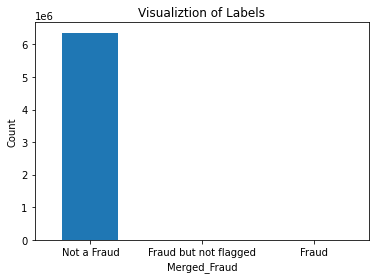

In [13]:
#classimbalance
labels = ["Not a Fraud", "Fraud but not flagged", "Fraud",]
count_classes = df.value_counts(df['Merged_Fraud'], sort = True)
count_classes.plot(kind="bar",rot=0)
plt.title("Visualiztion of Labels")
plt.ylabel("Count")
plt.xticks(range(3),labels)
plt.show()

In [14]:
#combining the columns since the correlation of the old and new balances are close to 1, so the redundant data can be dropped.

In [15]:
df.insert(3,'Difference_OrgBalance',df['newbalanceOrig']-df['oldbalanceOrg'],True)

In [16]:
df.insert(4,'Difference_DestBalance',df['newbalanceDest']-df['oldbalanceDest'],True)

In [17]:
df = df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest'],axis=1)

In [18]:
#dropping isFraud and isFlaggedFraud as they have been combined in a single column (Merged_Fraud)

In [19]:
df = df.drop(['isFraud','isFlaggedFraud'],axis=1)

In [20]:
df

,type,amount,Difference_OrgBalance,Difference_DestBalance,Merged_Fraud
0,PAYMENT,9839.64,-9839.64,0.00,0
1,PAYMENT,1864.28,-1864.28,0.00,0
2,TRANSFER,181.00,-181.00,0.00,1
3,CASH_OUT,181.00,-181.00,-21182.00,1
4,PAYMENT,11668.14,-11668.14,0.00,0
...,...,...,...,...,...
6362615,CASH_OUT,339682.13,-339682.13,339682.13,1
6362616,TRANSFER,6311409.28,-6311409.28,0.00,1
6362617,CASH_OUT,6311409.28,-6311409.28,6311409.27,1
6362618,TRANSFER,850002.52,-850002.52,0.00,1


In [21]:
#perfromimg one hot encoding on 'type' column as is a categorical data

In [22]:
one_hot_encoded_type = pd.get_dummies(df, columns = ['type'])
print(one_hot_encoded_type)


             amount  Difference_OrgBalance  Difference_DestBalance  \
0           9839.64               -9839.64                    0.00   
1           1864.28               -1864.28                    0.00   
2            181.00                -181.00                    0.00   
3            181.00                -181.00               -21182.00   
4          11668.14              -11668.14                    0.00   
...             ...                    ...                     ...   
6362615   339682.13             -339682.13               339682.13   
6362616  6311409.28            -6311409.28                    0.00   
6362617  6311409.28            -6311409.28              6311409.27   
6362618   850002.52             -850002.52                    0.00   
6362619   850002.52             -850002.52               850002.52   

        Merged_Fraud  type_CASH_IN  type_CASH_OUT  type_DEBIT  type_PAYMENT  \
0                  0             0              0           0             1   
1

In [23]:
one_hot_encoded_type.dtypes
 

amount                    float64
Difference_OrgBalance     float64
Difference_DestBalance    float64
Merged_Fraud               object
type_CASH_IN                uint8
type_CASH_OUT               uint8
type_DEBIT                  uint8
type_PAYMENT                uint8
type_TRANSFER               uint8
dtype: object

In [24]:
df=pd.DataFrame(one_hot_encoded_type)

In [25]:
df

,amount,Difference_OrgBalance,Difference_DestBalance,Merged_Fraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,-9839.64,0.00,0,0,0,0,1,0
1,1864.28,-1864.28,0.00,0,0,0,0,1,0
2,181.00,-181.00,0.00,1,0,0,0,0,1
3,181.00,-181.00,-21182.00,1,0,1,0,0,0
4,11668.14,-11668.14,0.00,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
6362615,339682.13,-339682.13,339682.13,1,0,1,0,0,0
6362616,6311409.28,-6311409.28,0.00,1,0,0,0,0,1
6362617,6311409.28,-6311409.28,6311409.27,1,0,1,0,0,0
6362618,850002.52,-850002.52,0.00,1,0,0,0,0,1


/home/ishan/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


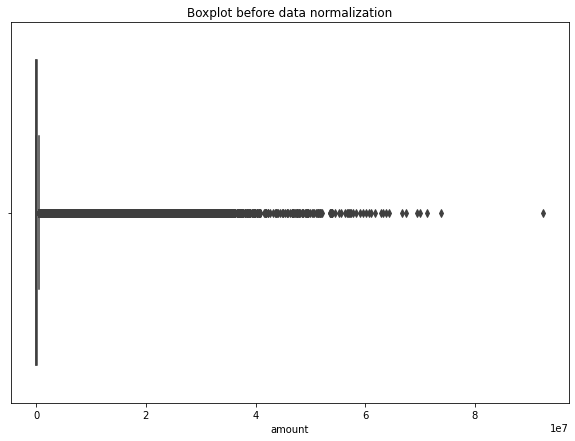

In [26]:
#for finding outliers
fig = plt.figure(figsize =(10, 7))
plt.title('Boxplot before data normalization')
sns.boxplot(df['amount'])
plt.show()

In [27]:
#normalizing the amount and balance columns using min-max scaler

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[['amount','Difference_OrgBalance','Difference_DestBalance']])
print(scaled)

[[1.06437179e-04 8.38433550e-01 1.09987141e-01]
 [2.01662565e-05 8.39102889e-01 1.09987141e-01]
 [1.95790998e-06 8.39244160e-01 1.09987141e-01]
 ...
 [6.82716643e-02 3.09568425e-01 1.63136449e-01]
 [9.19463216e-03 7.67922094e-01 1.09987141e-01]
 [9.19463216e-03 7.67922094e-01 1.17145138e-01]]


In [30]:
df1 = pd.DataFrame(scaled,columns=['norm_amount','norm_Difference_OrgBalance','norm_Difference_DestBalance'])

In [31]:
df1

,norm_amount,norm_Difference_OrgBalance,norm_Difference_DestBalance
0,0.000106,0.838434,0.109987
1,0.000020,0.839103,0.109987
2,0.000002,0.839244,0.109987
3,0.000002,0.839244,0.109809
4,0.000126,0.838280,0.109987
...,...,...,...
6362615,0.003674,0.810751,0.112848
6362616,0.068272,0.309568,0.109987
6362617,0.068272,0.309568,0.163136
6362618,0.009195,0.767922,0.109987


In [32]:
data = [df,df1]
data = pd.concat([df,df1],axis = 1,join='outer') #axis = 1 for appending on columns

In [33]:
data

,amount,Difference_OrgBalance,Difference_DestBalance,Merged_Fraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,norm_amount,norm_Difference_OrgBalance,norm_Difference_DestBalance
0,9839.64,-9839.64,0.00,0,0,0,0,1,0,0.000106,0.838434,0.109987
1,1864.28,-1864.28,0.00,0,0,0,0,1,0,0.000020,0.839103,0.109987
2,181.00,-181.00,0.00,1,0,0,0,0,1,0.000002,0.839244,0.109987
3,181.00,-181.00,-21182.00,1,0,1,0,0,0,0.000002,0.839244,0.109809
4,11668.14,-11668.14,0.00,0,0,0,0,1,0,0.000126,0.838280,0.109987
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,339682.13,-339682.13,339682.13,1,0,1,0,0,0,0.003674,0.810751,0.112848
6362616,6311409.28,-6311409.28,0.00,1,0,0,0,0,1,0.068272,0.309568,0.109987
6362617,6311409.28,-6311409.28,6311409.27,1,0,1,0,0,0,0.068272,0.309568,0.163136
6362618,850002.52,-850002.52,0.00,1,0,0,0,0,1,0.009195,0.767922,0.109987


In [34]:
data = data.drop(['amount','Difference_OrgBalance','Difference_DestBalance'],axis = 1)

In [35]:
data

,Merged_Fraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,norm_amount,norm_Difference_OrgBalance,norm_Difference_DestBalance
0,0,0,0,0,1,0,0.000106,0.838434,0.109987
1,0,0,0,0,1,0,0.000020,0.839103,0.109987
2,1,0,0,0,0,1,0.000002,0.839244,0.109987
3,1,0,1,0,0,0,0.000002,0.839244,0.109809
4,0,0,0,0,1,0,0.000126,0.838280,0.109987
...,...,...,...,...,...,...,...,...,...
6362615,1,0,1,0,0,0,0.003674,0.810751,0.112848
6362616,1,0,0,0,0,1,0.068272,0.309568,0.109987
6362617,1,0,1,0,0,0,0.068272,0.309568,0.163136
6362618,1,0,0,0,0,1,0.009195,0.767922,0.109987


In [37]:
x_train = data[['type_CASH_IN','type_CASH_OUT','type_DEBIT','type_PAYMENT','type_TRANSFER','norm_amount','norm_Difference_OrgBalance','norm_Difference_DestBalance']]
y_train = data['Merged_Fraud']
y_train =y_train.astype('int')

In [38]:
y_train

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: Merged_Fraud, Length: 6362620, dtype: int64

In [39]:
Y_train = y_train.values

In [40]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(data , test_size=0.2,random_state=42)

In [41]:
train_set

,Merged_Fraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,norm_amount,norm_Difference_OrgBalance,norm_Difference_DestBalance
6271196,0,1,0,0,0,0,0.004180,0.871687,0.106733
1888243,0,1,0,0,0,0,0.002298,0.857090,0.108198
5549957,0,0,0,0,1,0,0.000216,0.838954,0.109987
2025342,0,0,1,0,0,0,0.005707,0.824135,0.114430
682342,0,0,0,0,0,1,0.002229,0.839259,0.111722
...,...,...,...,...,...,...,...,...,...
1570006,0,1,0,0,0,0,0.001403,0.850146,0.108895
2234489,0,0,0,0,1,0,0.000027,0.839259,0.109987
4926484,0,0,1,0,0,0,0.000114,0.838371,0.110076
4304572,0,0,1,0,0,0,0.000790,0.837557,0.110602


In [42]:
test_set

,Merged_Fraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,norm_amount,norm_Difference_OrgBalance,norm_Difference_DestBalance
3737323,0,1,0,0,0,0,0.003572,0.866973,0.107206
264914,0,0,0,0,1,0,0.000126,0.838282,0.109987
85647,0,1,0,0,0,0,0.001647,0.852038,0.108705
5899326,0,0,0,0,0,1,0.016786,0.839259,0.123055
2544263,0,1,0,0,0,0,0.000846,0.845820,0.109329
...,...,...,...,...,...,...,...,...,...
2210524,0,0,0,0,1,0,0.000010,0.839182,0.109987
956542,0,0,0,0,1,0,0.000005,0.839219,0.109987
5474798,0,0,1,0,0,0,0.002688,0.839217,0.112080
878120,0,0,1,0,0,0,0.002164,0.839259,0.111671


In [43]:
x_test = test_set[['type_CASH_IN','type_CASH_OUT','type_DEBIT','type_PAYMENT','type_TRANSFER','norm_amount','norm_Difference_OrgBalance','norm_Difference_DestBalance']]
y_test = test_set[['Merged_Fraud']]                   

In [44]:
print("Before OverSampling, counts of label '2': {}".format(sum(y_train == 2)))
print("Before OverSampling, counts of label '1': {} \n".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

Before OverSampling, counts of label '2': 16
Before OverSampling, counts of label '1': 8197 

Before OverSampling, counts of label '0': 6354407 



In [45]:
data["Merged_Fraud"].value_counts()

0    6354407
1       8197
2         16
Name: Merged_Fraud, dtype: int64

In [46]:
# class count
class_count_0, class_count_1,class_count_2 = data['Merged_Fraud'].value_counts()

# Separate class
class_0 = data[data['Merged_Fraud'] == 0]
class_1 = data[data['Merged_Fraud'] == 1]
class_2 = data[data['Merged_Fraud'] == 2]
# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)
print('class 2:', class_2.shape)

class 0: (6354407, 9)
class 1: (8197, 9)
class 2: (16, 9)


In [48]:
#applying random forest classifier and passing the class weight = 'balanced' parameter to try and balance the class weights.
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=2, class_weight="balanced")

# fit the predictor and target
rfc.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=2)

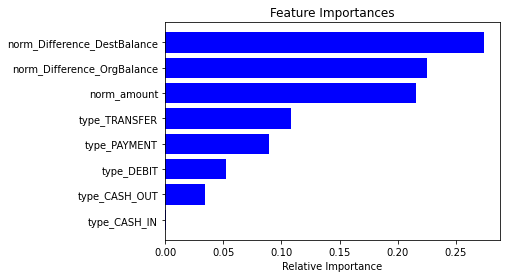

In [52]:
features=  data[['type_CASH_IN','type_CASH_OUT','type_DEBIT','type_PAYMENT','type_TRANSFER','norm_amount','norm_Difference_OrgBalance','norm_Difference_DestBalance']]
importances = rfc.feature_importances_
indices = np.argsort(importances)
data.reset_index(drop=True, inplace=True)

plt.figure()
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), ['type_CASH_IN','type_CASH_OUT','type_DEBIT','type_PAYMENT','type_TRANSFER','norm_amount','norm_Difference_OrgBalance','norm_Difference_DestBalance'])
plt.xlabel('Relative Importance')
plt.show()

In [53]:
rfc_predict = rfc.predict(x_test)# check performance

In [54]:
np.sum(y_test["Merged_Fraud"].values == rfc_predict)/len(rfc_predict)

0.8600490049696509

In [64]:
y_test = y_test.values.reshape(-1)

In [73]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion = confusion_matrix(list(y_test), list(rfc_predict))

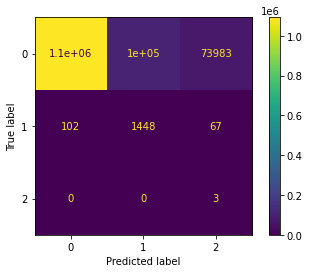

In [76]:
plot_confusion_matrix(rfc, x_test, list(y_test))

# Conclusion and result
The accuracy of the model is 86 percent.The classes are imbalanced because of which it is difficult to rely only on the accuracy of the model.Hence,We need to look at the F1 score for further improvement.
